# Movie Rating Analysis using Advanced Visualization

In [137]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

In [335]:
# Load the dataset
movies = pd.read_csv(r"C:\Users\sagar\OneDrive\Desktop\Data science with GenAI\19Aug\MOVIE RATINGS _ ADVANCE VISUALIZATION _ EDA 1\Movie-Rating.csv")

In [341]:
# Overview of the dataset
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [343]:
print(type(movies))          # Check the type of the dataset

<class 'pandas.core.frame.DataFrame'>


In [345]:
print(len(movies))           # Get the number of rows in the dataset

559


In [347]:
print(movies.shape)          # Get the shape of the dataset (rows, columns)

(559, 6)


In [349]:
print(movies.columns)        # List the column names

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')


In [351]:
movies.info()                # Get detailed information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [153]:
# Display the first  rows
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [155]:
# Display the last few
movies.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [357]:
# Rename columns for better readability
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRatings', 'BudgetMillions', 'Year']
movies.head()

,Film,Genre,CriticRating,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [162]:
# Basic statistical description of the dataset
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


#### As we can see, when we apply describe(), it performs statistical analysis on the 'Year' column as well, which isn't appropriate. Therefore, we need to change its data type.

In [366]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRating     559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   BudgetMillions   559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [368]:
# Convert columns to categorical data types where appropriate
movies.Film = movies.Film.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")

In [370]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRating     559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   BudgetMillions   559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [372]:
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


* basically joint plot is a scatter plot & it find the relation b/w audiene & critics
* also if you look up you can find the uniform distribution (critics)and normal distriution (audience)

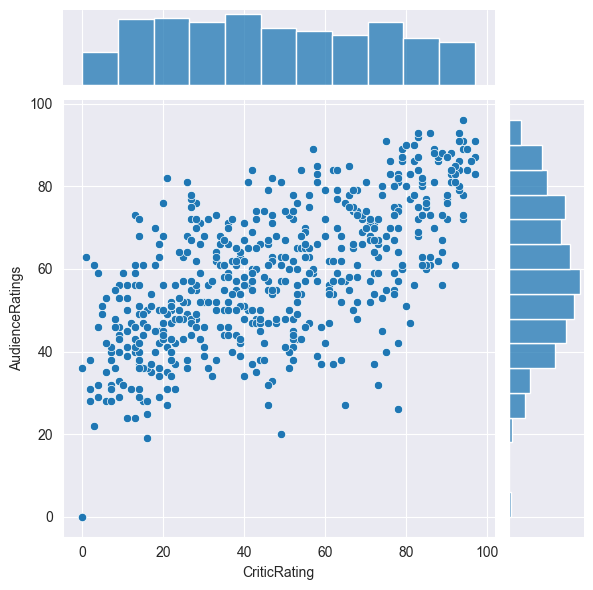

In [377]:
# Visualize the relationship between Critic Ratings and Audience Ratings using different plots
sns.set_style("darkgrid")
sns.jointplot(data=movies, x="CriticRating", y="AudienceRatings", kind="scatter")

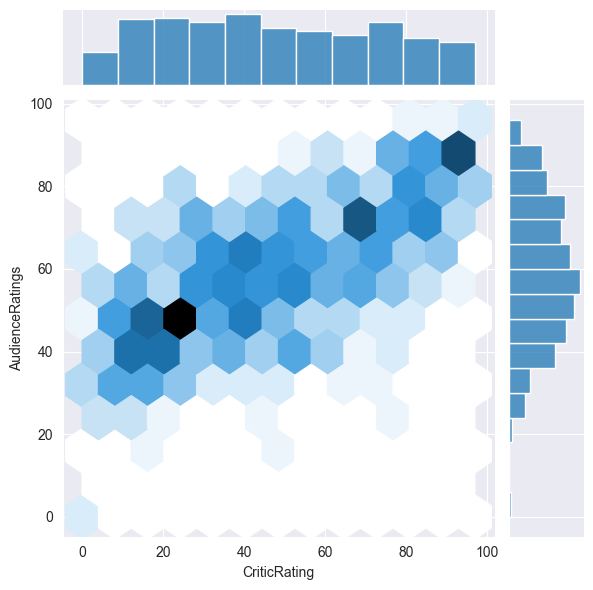

In [379]:
sns.jointplot(data=movies, x="CriticRating", y="AudienceRatings", kind="hex")

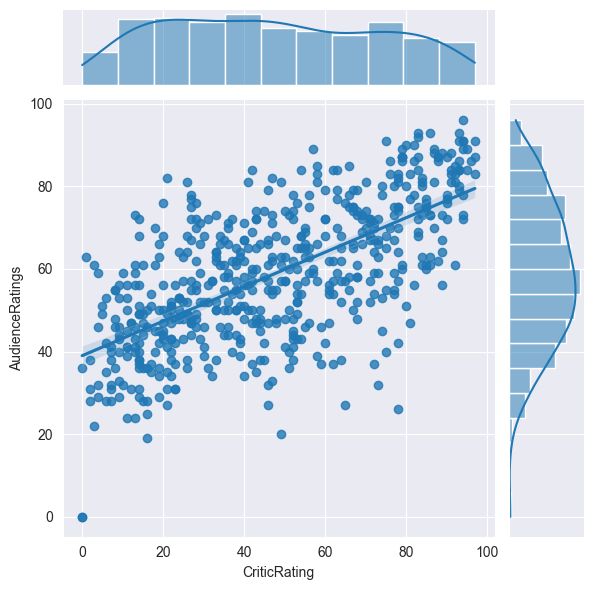

In [380]:
sns.jointplot(data=movies, x="CriticRating", y="AudienceRatings", kind="reg")

<Axes: xlabel='AudienceRatings', ylabel='Density'>

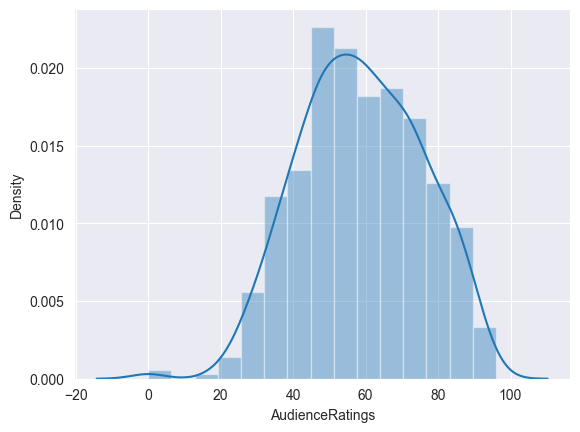

In [383]:
# Distribution plots for Audience and Critic Ratings
sns.distplot(movies.AudienceRatings, bins=15)

<Axes: xlabel='CriticRating', ylabel='Density'>

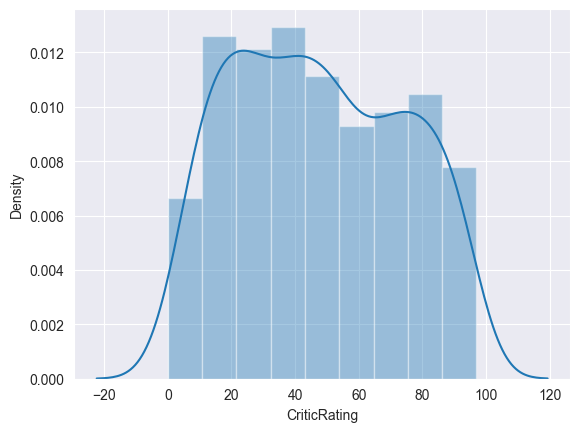

In [385]:
sns.distplot(movies.CriticRating)

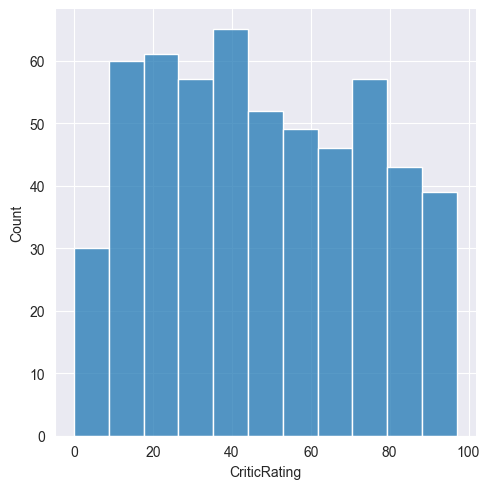

In [387]:
sns.displot(movies.CriticRating)

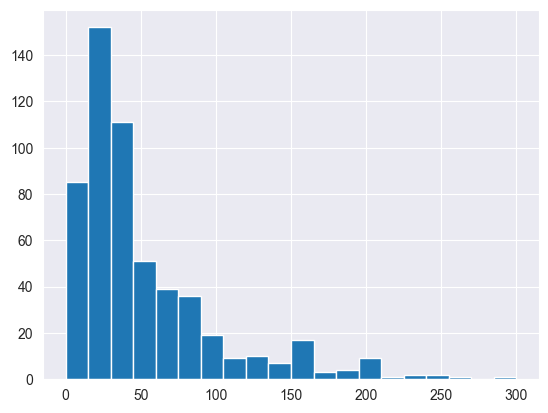

In [389]:
# Histograms of Budget for different genres
plt.hist(movies.BudgetMillions, bins=20)
plt.show()


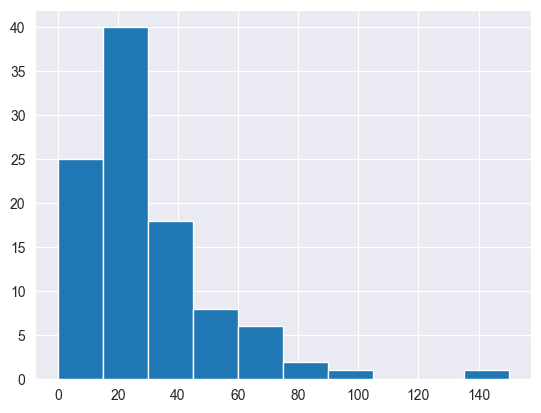

In [391]:
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions)
plt.show()

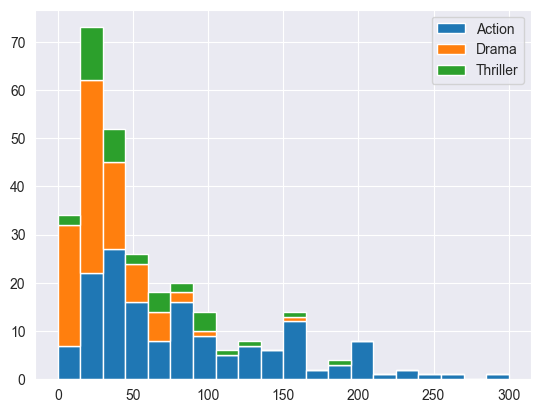

In [393]:
# Comparing budgets across genres
plt.hist([movies[movies.Genre == "Action"].BudgetMillions,
          movies[movies.Genre == "Drama"].BudgetMillions,
          movies[movies.Genre == "Thriller"].BudgetMillions],
         bins=20, stacked=True, label=["Action", "Drama", "Thriller"])
plt.legend()
plt.show()

In [216]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


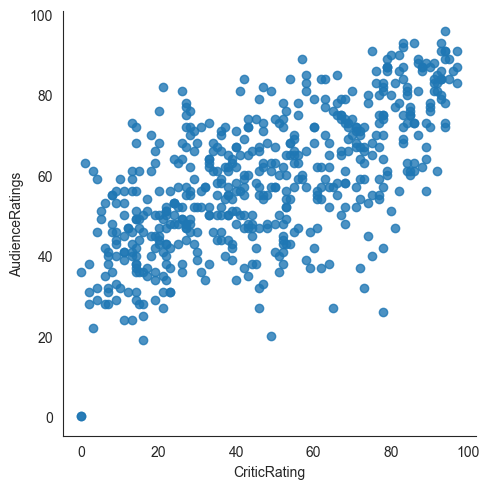

In [218]:
vis1 = sns.lmplot(data = movies, x= "CriticRating", y="AudienceRatings",\
                fit_reg = False)

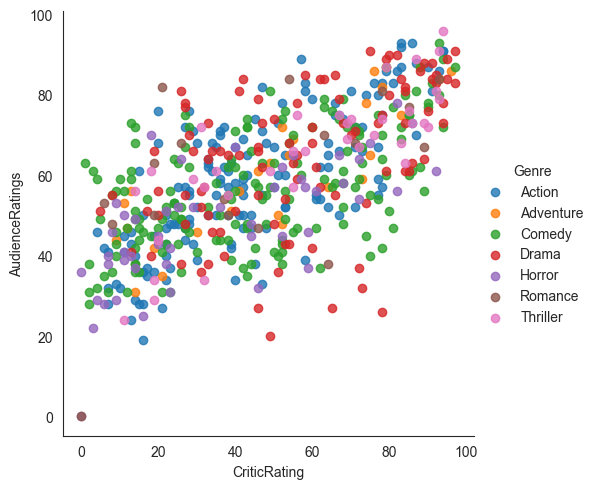

In [220]:
vis1 = sns.lmplot(data=movies,x="CriticRating",y="AudienceRatings",\
                fit_reg=False,hue ="Genre")

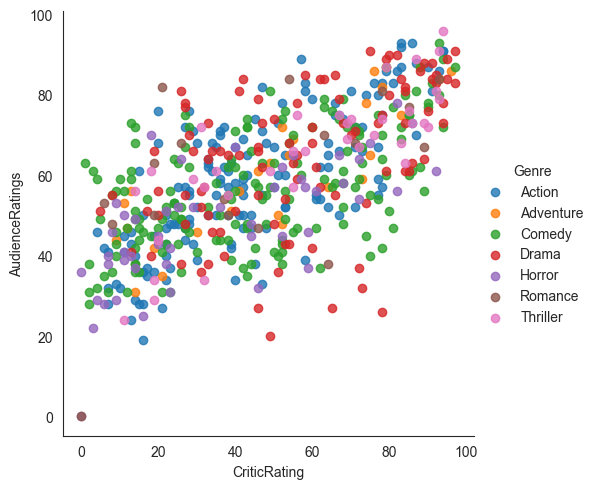

In [221]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRatings',\
                 fit_reg=False, hue = 'Genre',aspect=1) 

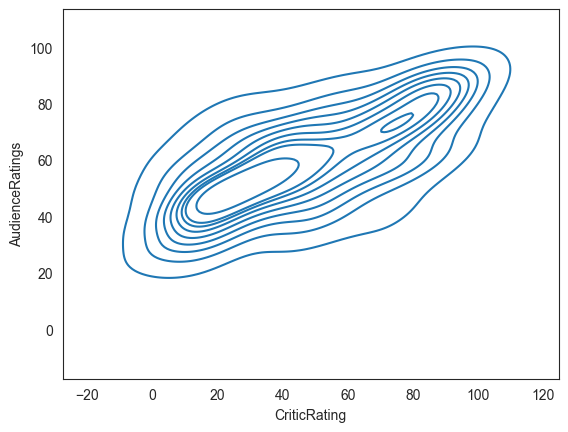

In [223]:
k1 = sns.kdeplot(x=movies.CriticRating,y=movies.AudienceRatings)
# where do u find more density and how density is distibuted across from the the chat 
# center point is kernal this is calld KDE & insteade of dots it visualize like this
# we can able to clearly see the spread at the audience ratings

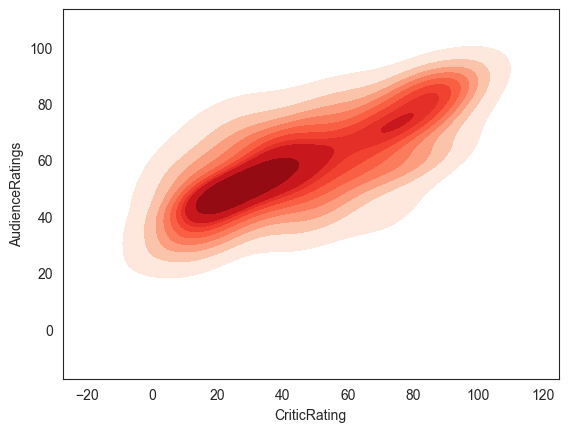

In [320]:
k1 = sns.kdeplot(x=movies.CriticRating, y= movies.AudienceRatings,shade =True,
                 shade_lowest =False, cmap ="Reds")

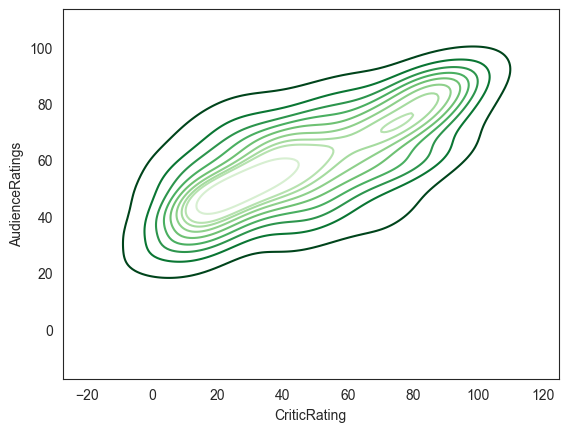

In [316]:
k1 = sns.kdeplot(x=movies.CriticRating, y= movies.AudienceRatings,
                 shade_lowest =False, cmap ="Greens_r")

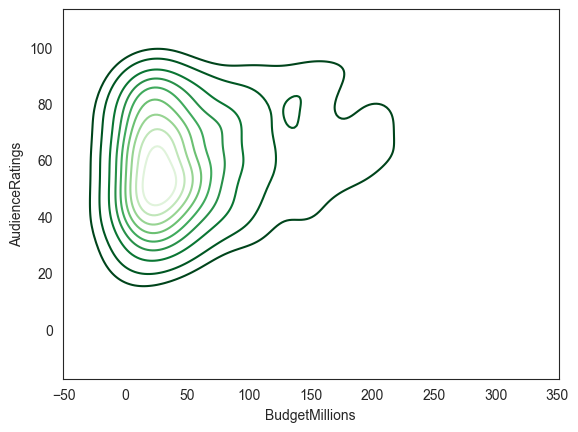

In [229]:
k1= sns.kdeplot(x= movies.BudgetMillions,y=movies.AudienceRatings,shade_lowest=False,cmap="Greens_r")

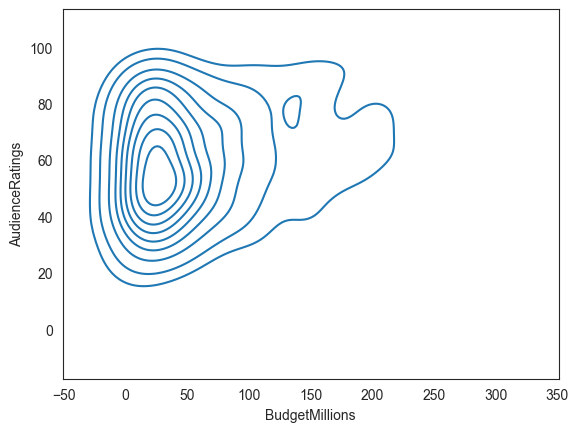

In [230]:
k2= sns.kdeplot(x=movies.BudgetMillions,y=movies.AudienceRatings)

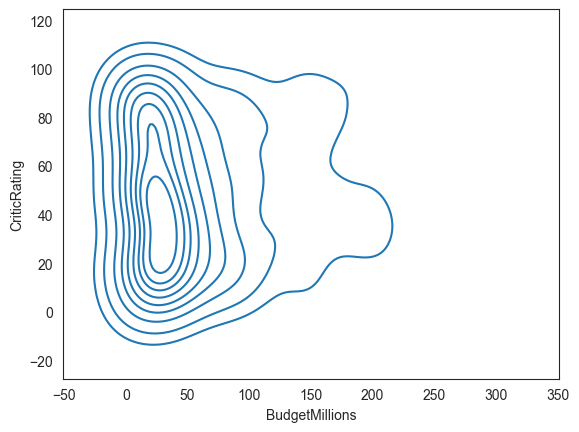

In [231]:
k2= sns.kdeplot(x= movies.BudgetMillions,y= movies.CriticRating)

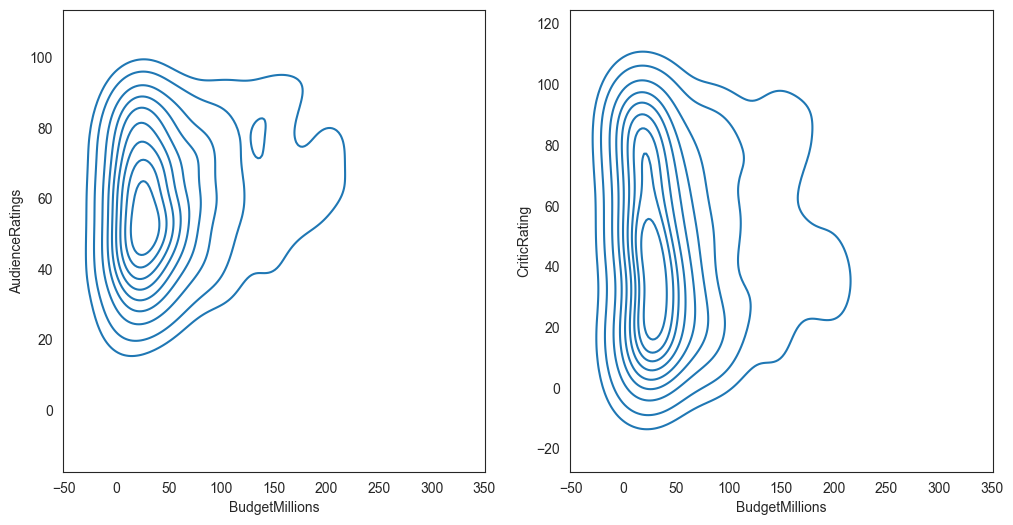

In [235]:
f,axes = plt.subplots(1,2,figsize=(12,6))
k1=sns.kdeplot(x= movies.BudgetMillions,y= movies.AudienceRatings, ax=axes[0])
k1=sns.kdeplot(x= movies.BudgetMillions, y=movies.CriticRating, ax=axes[1])

In [236]:
axes

array([<Axes: xlabel='BudgetMillions', ylabel='AudienceRatings'>,
       <Axes: xlabel='BudgetMillions', ylabel='CriticRating'>],
      dtype=object)

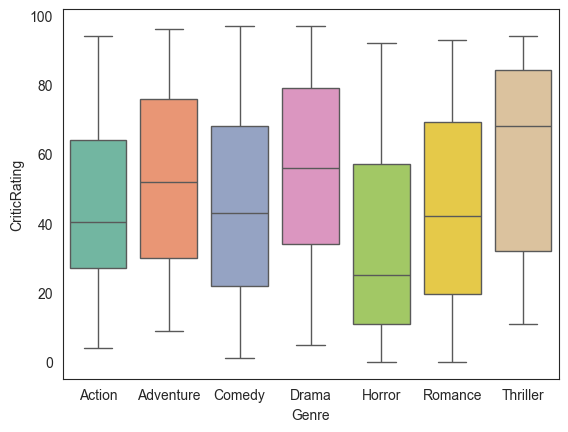

In [237]:
w= sns.boxplot(data=movies,x="Genre", y="CriticRating", palette="Set2")

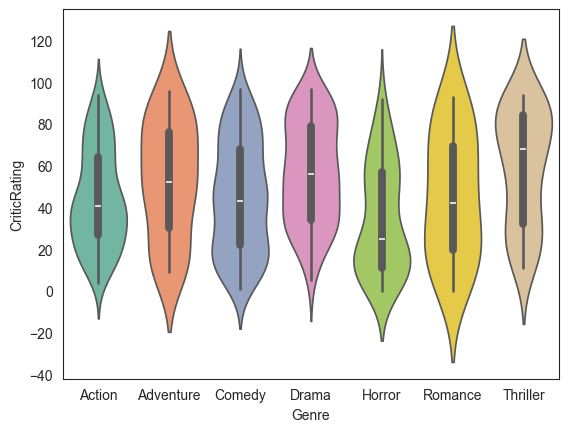

In [239]:
z = sns.violinplot(data = movies, x="Genre",y= "CriticRating", palette ="Set2")

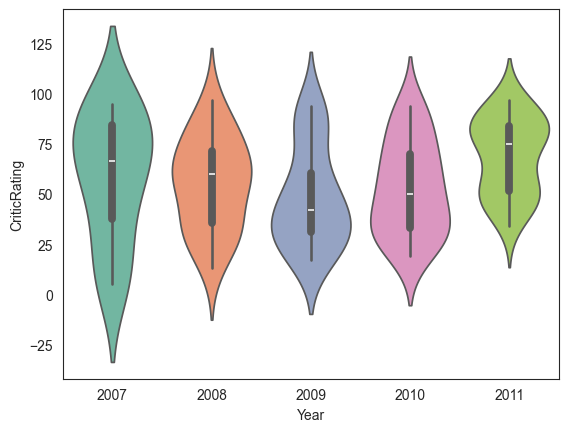

In [240]:
z= sns.violinplot(data=movies[movies.Genre=="Drama"],x= "Year",y="CriticRating",palette ="Set2")

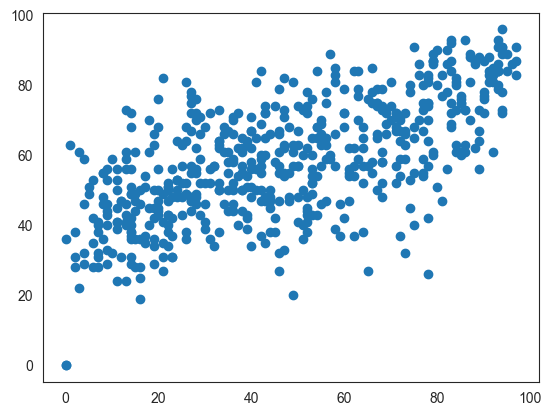

In [242]:
plt.scatter(movies.CriticRating,movies.AudienceRatings)

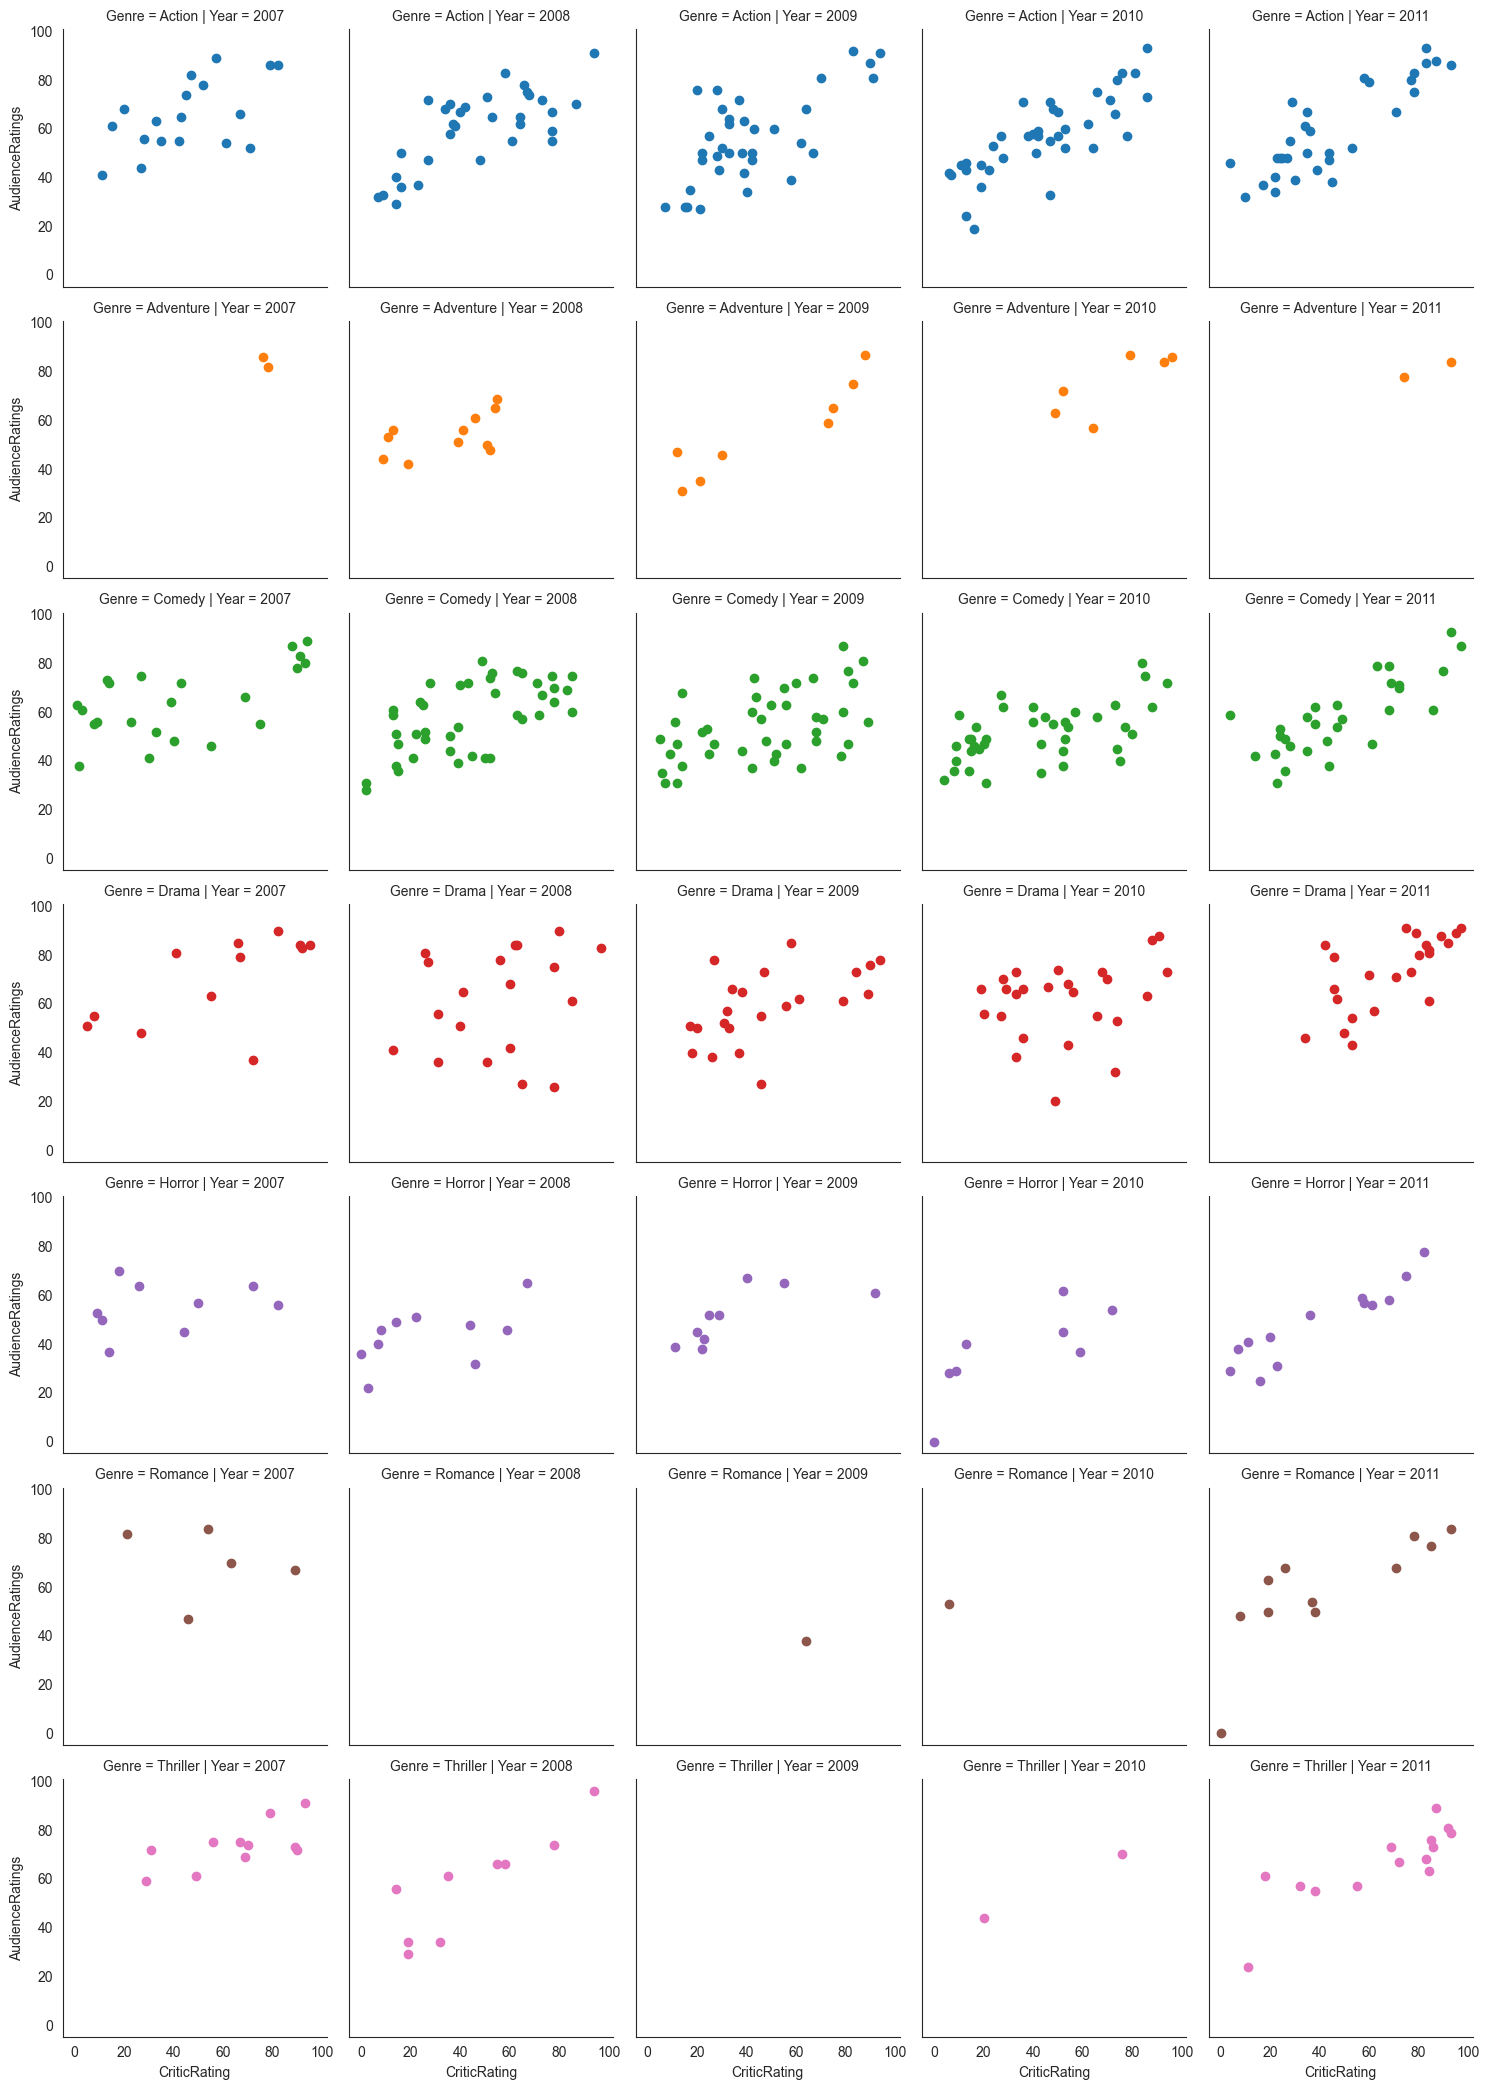

In [243]:
g= sns.FacetGrid(movies,row="Genre", col="Year", hue="Genre")
g=g.map(plt.scatter, "CriticRating","AudienceRatings")

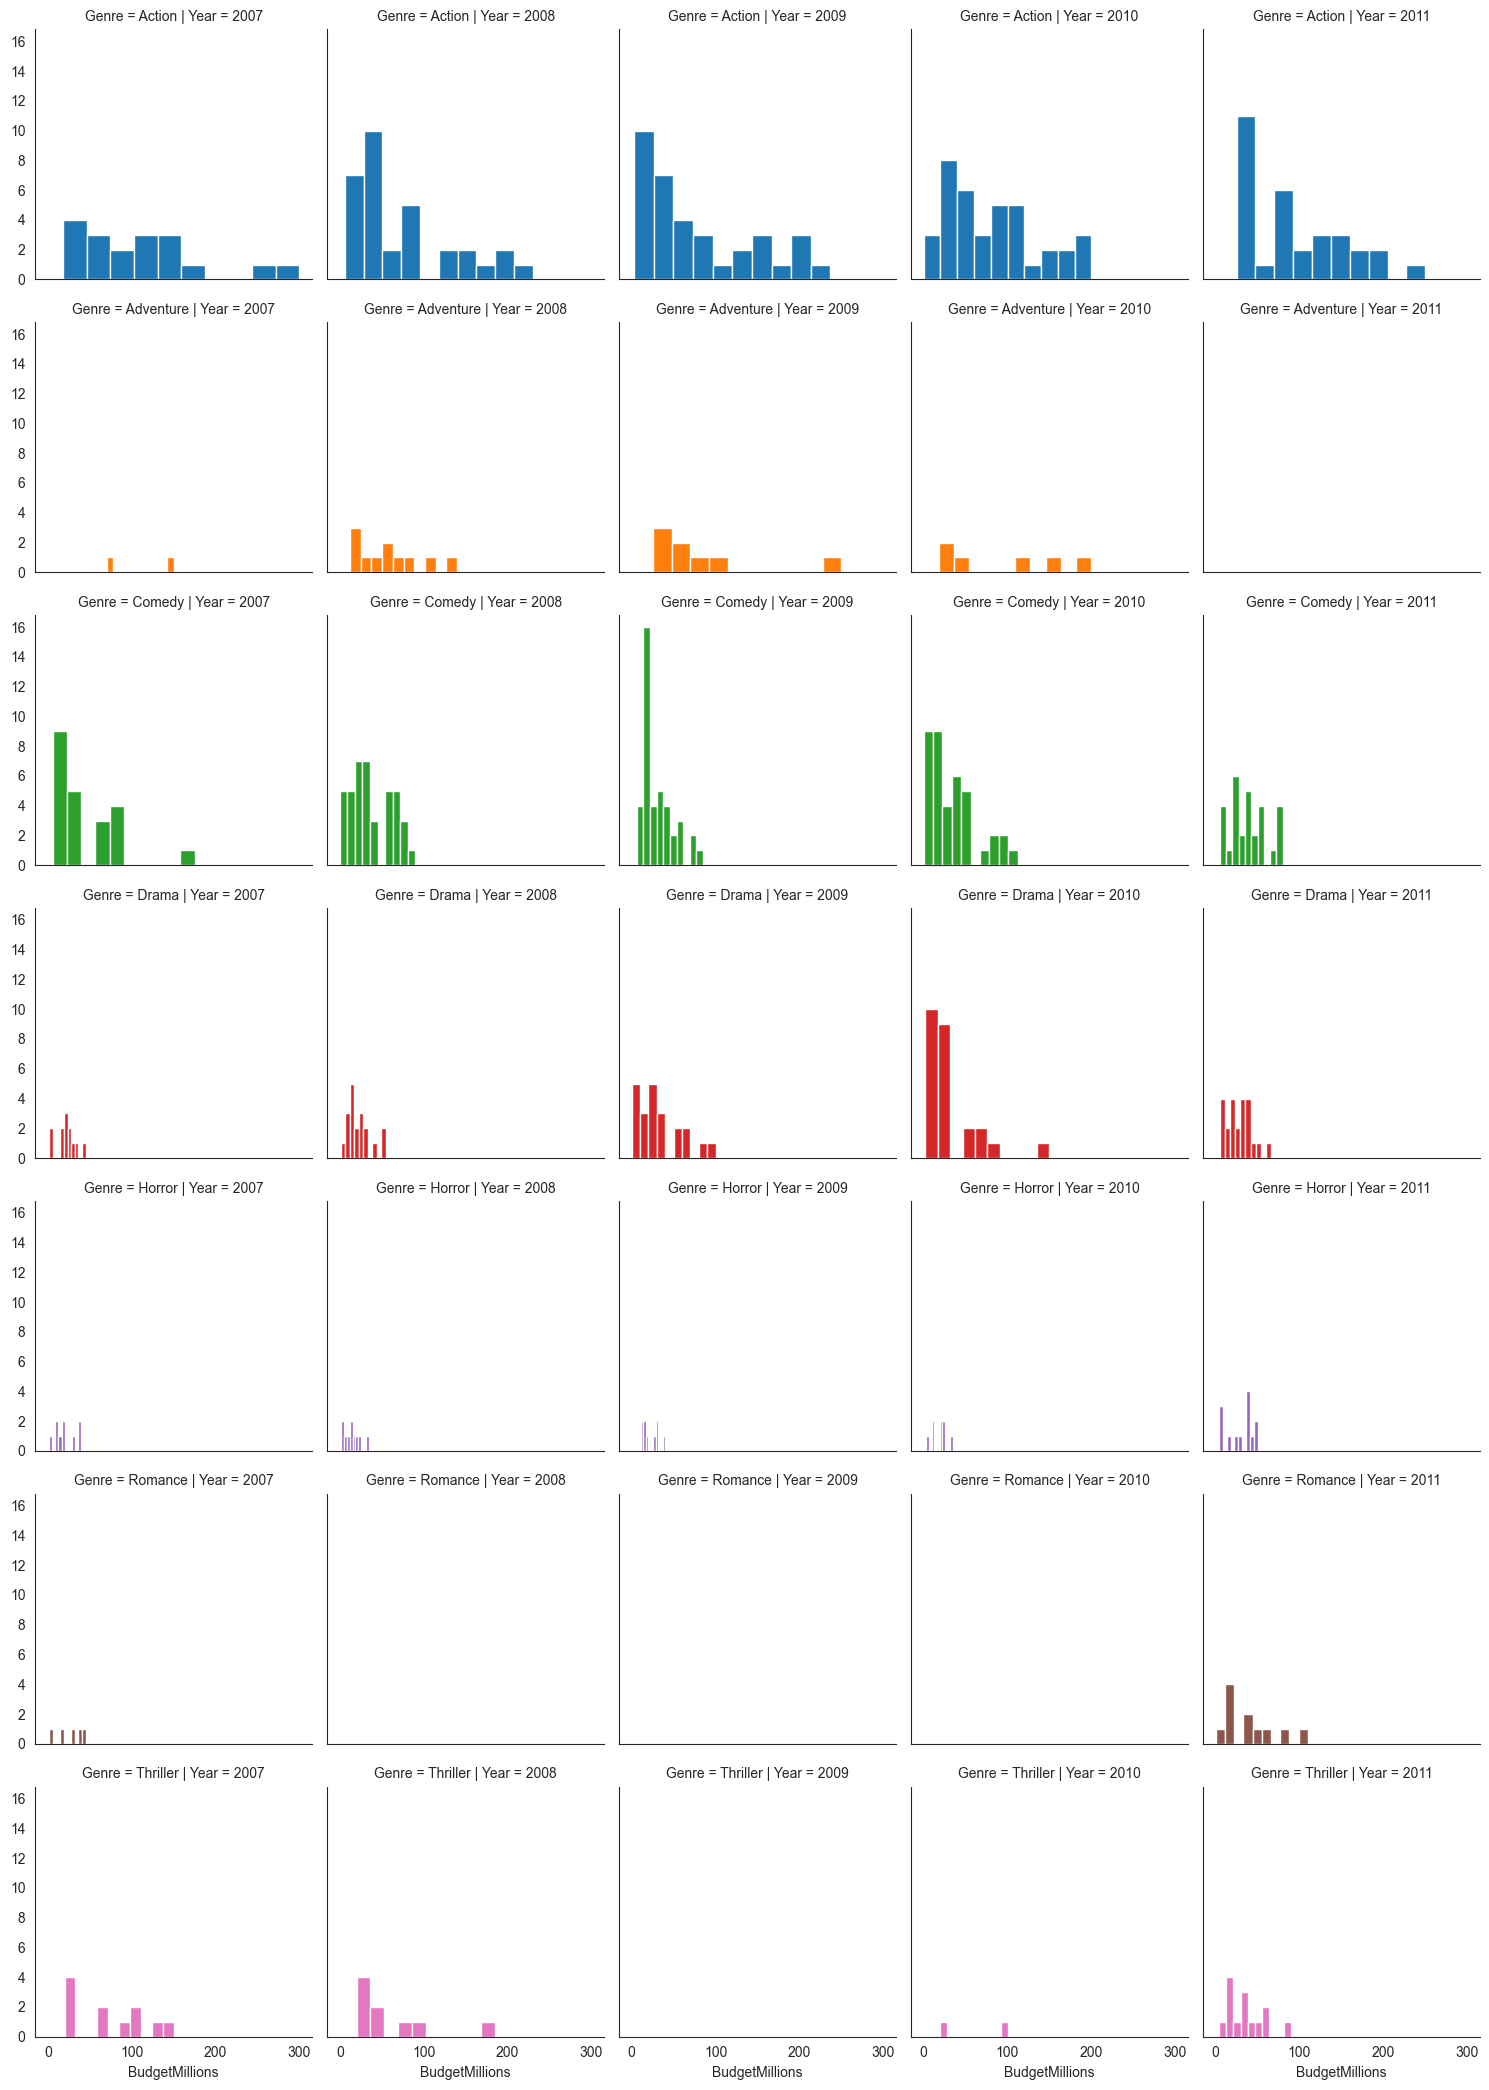

In [244]:
g= sns.FacetGrid(movies,row="Genre", col ="Year",hue="Genre")
g=g.map(plt.hist,"BudgetMillions")

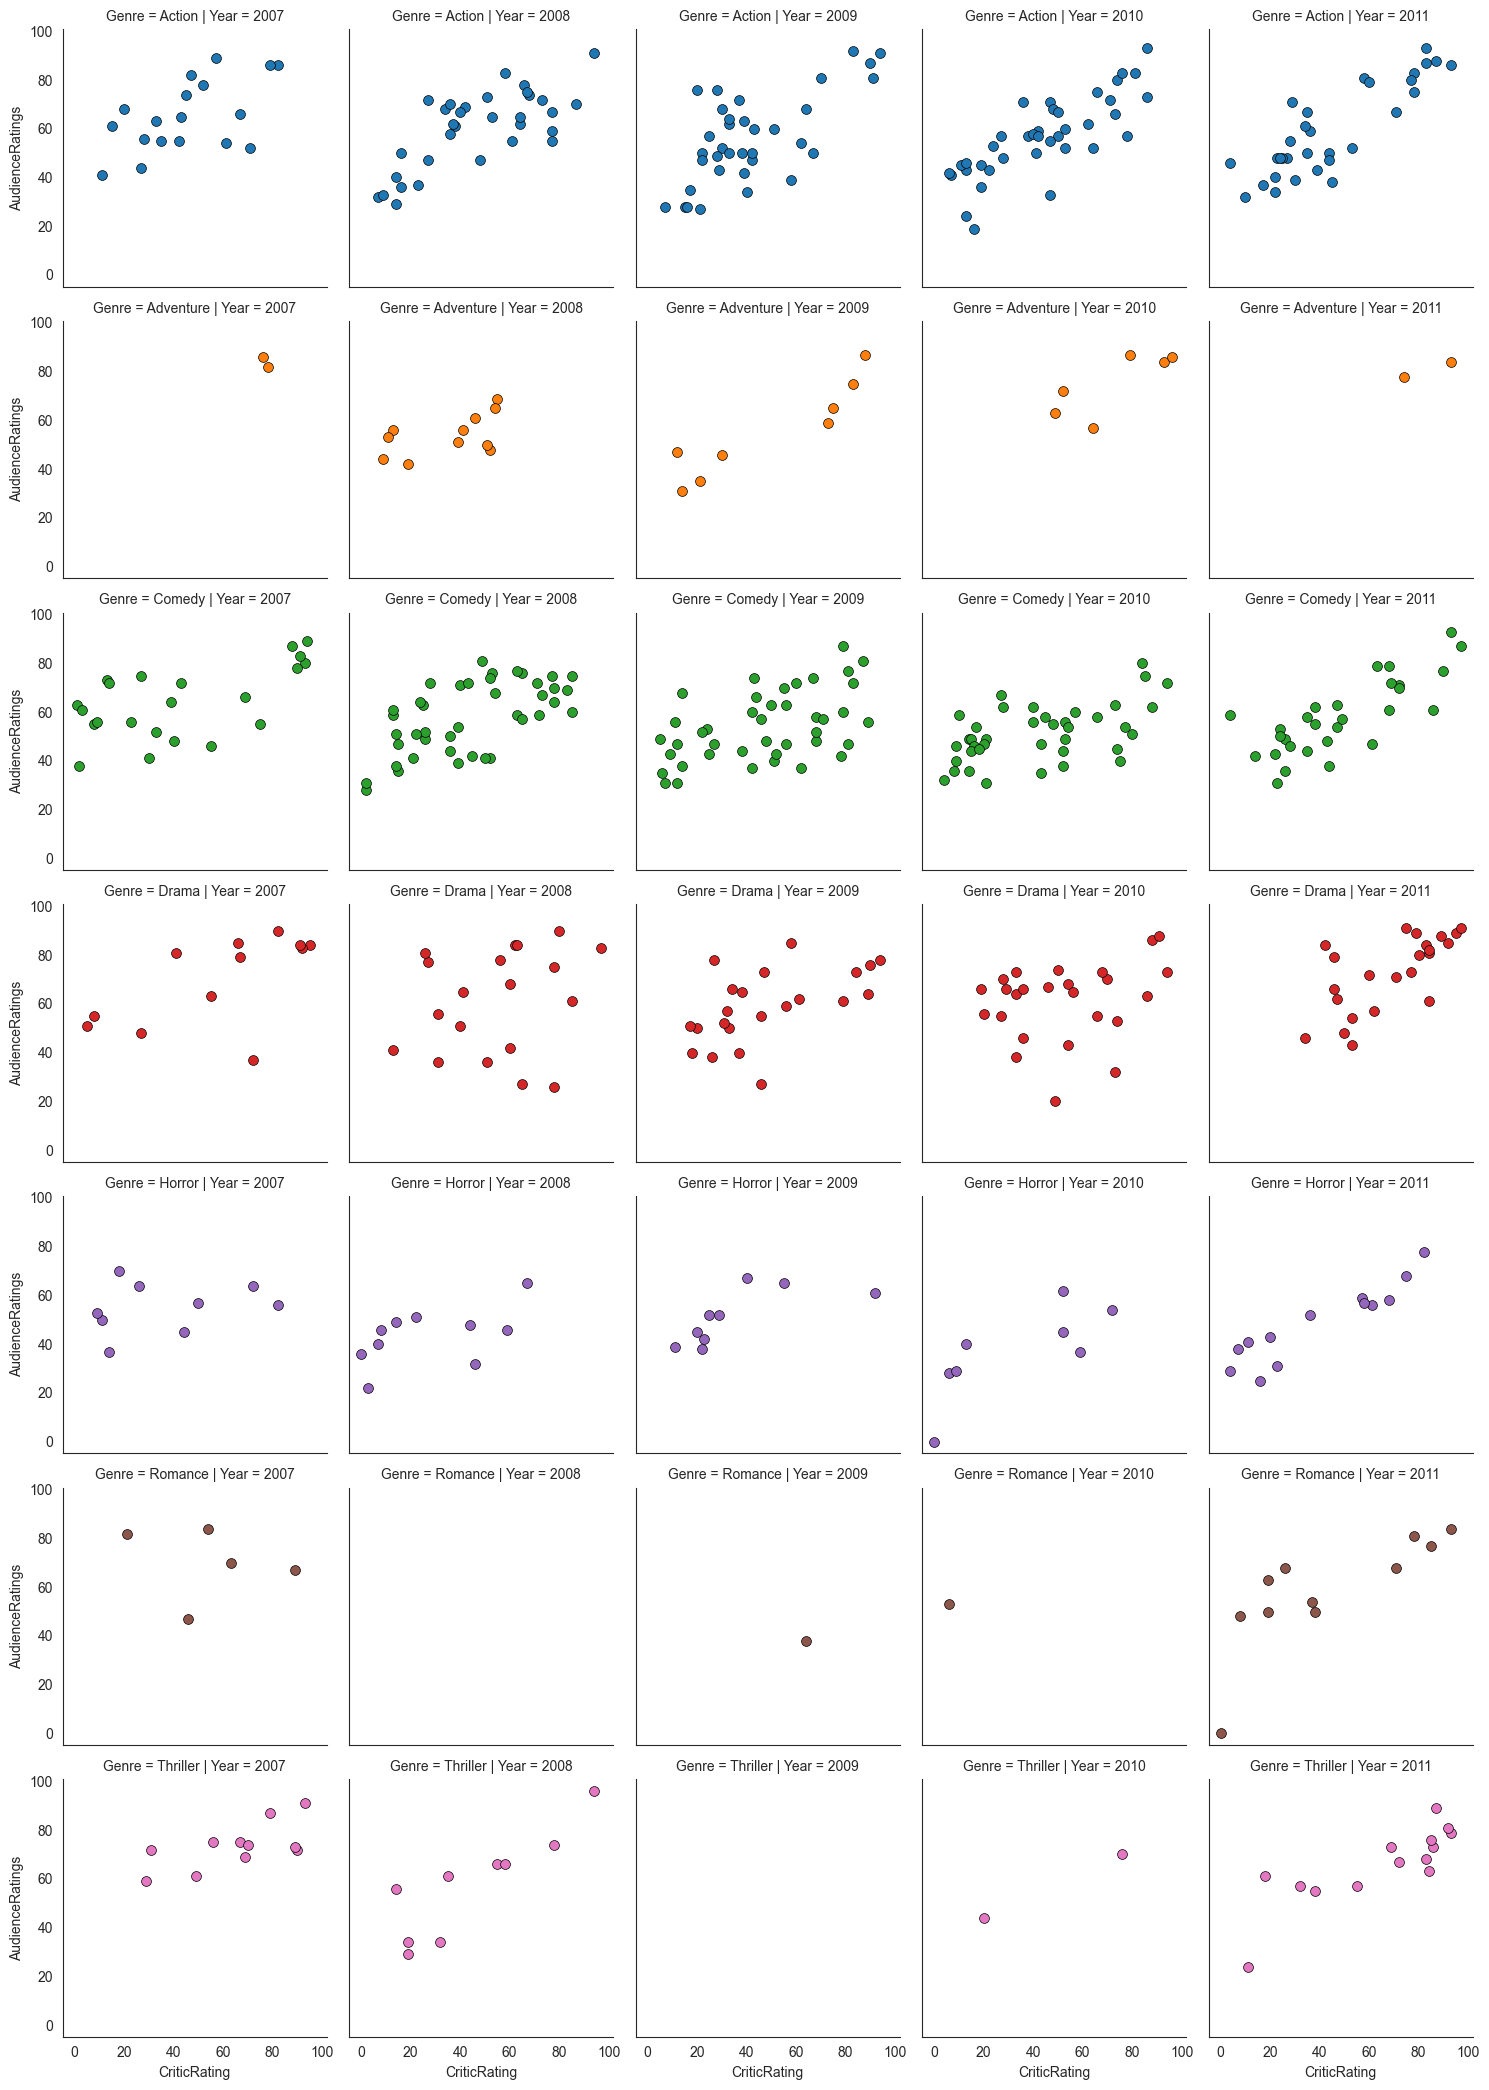

In [245]:
g= sns.FacetGrid(movies,row="Genre",col="Year",hue="Genre")
kws= dict(s=50,linewidth=0.5,edgecolor="black")
g=g.map(plt.scatter, "CriticRating","AudienceRatings",**kws)

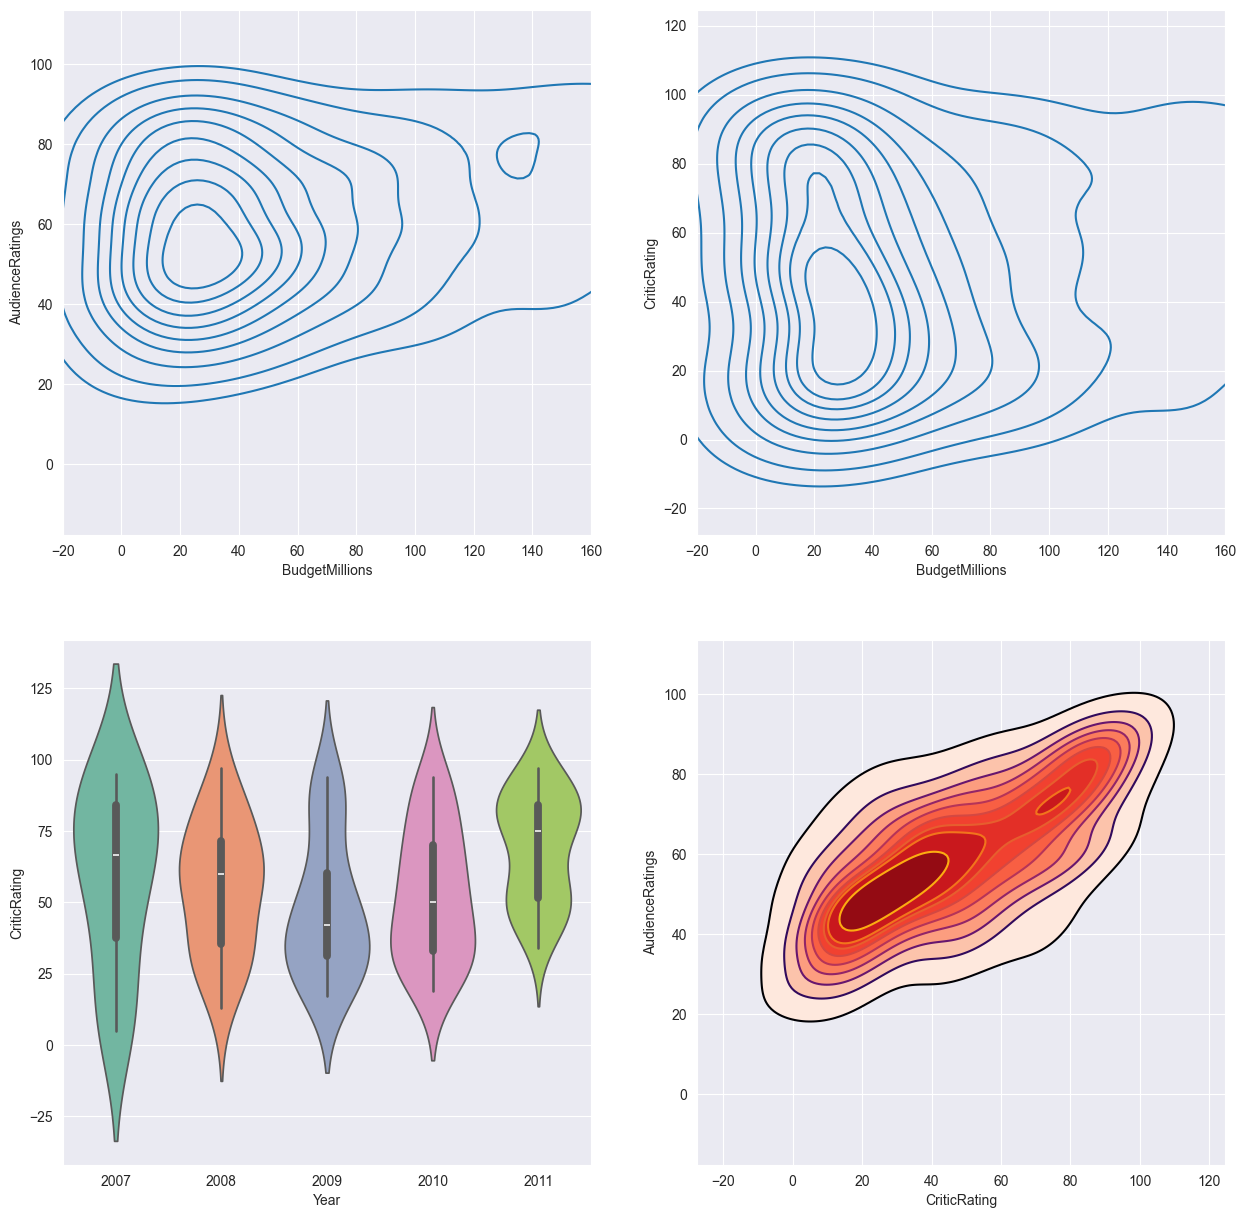

In [328]:
# python is not vectorize programming language
# Building dashboards (dashboard - combination of chats)

sns.set_style('darkgrid')
f, axes = plt.subplots (2,2, figsize = (15,15))

k1 = sns.kdeplot(x=movies.BudgetMillions,y=movies.AudienceRatings,ax=axes[0,0])
k2 = sns.kdeplot(x=movies.BudgetMillions,y=movies.CriticRating,ax = axes[0,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y = 'CriticRating', ax=axes[1,0],palette ="Set2")

k4 = sns.kdeplot(x=movies.CriticRating,y=movies.AudienceRatings,shade = True,shade_lowest=False,cmap='Reds',ax=axes[1,1])

k4b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRatings,cmap='inferno',ax = axes[1,1])

plt.show()

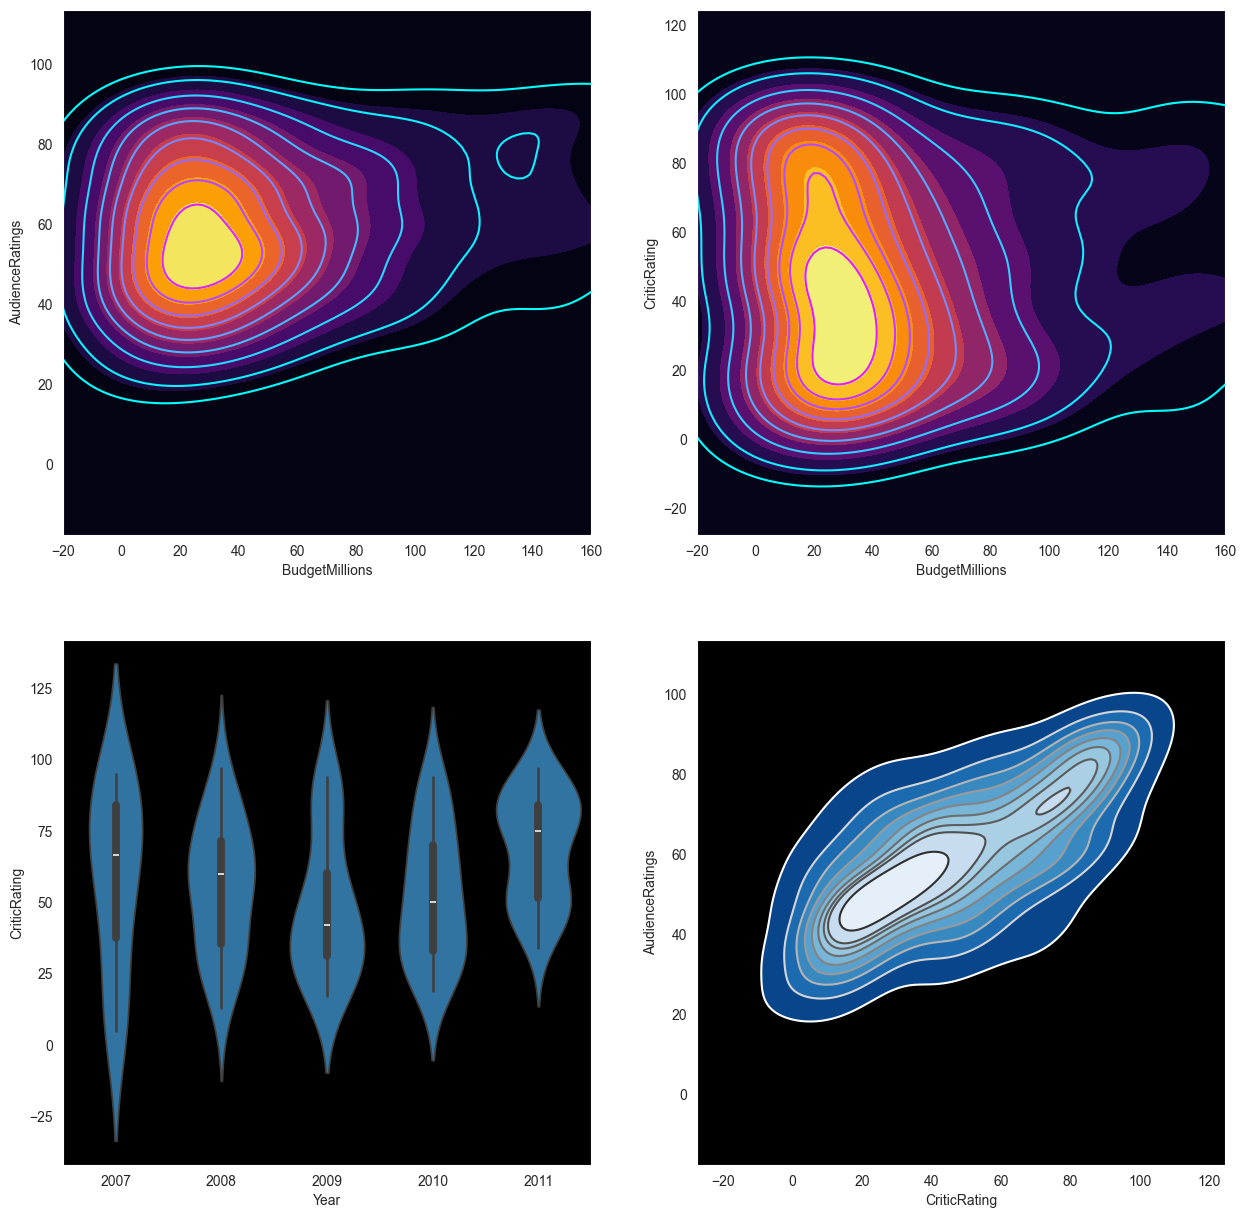

In [332]:
# How can you style your dashboard  using different color map

# python is not vectorize programming language
# Building dashboards (dashboard - combination of chats)

sns.set_style('dark',{'axes.facecolor':'black'})
f, axes = plt.subplots (2,2, figsize = (15,15))

#plot [0,0]
k1 = sns.kdeplot(x=movies.BudgetMillions,y=movies.AudienceRatings, \
                 shade = True, shade_lowest=True,cmap = 'inferno', \
                 ax = axes[0,0])
k1b = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRatings, \
                 cmap = 'cool',ax = axes[0,0])

#plot [0,1]
k2 = sns.kdeplot(x=movies.BudgetMillions,y=movies.CriticRating,\
                 shade=True, shade_lowest=True, cmap='inferno',\
                 ax = axes[0,1])
k2b = sns.kdeplot(x=movies.BudgetMillions,y=movies.CriticRating,\
                  cmap = 'cool', ax = axes[0,1])

#plot[1,0]
z = sns.violinplot(data=movies[movies.Genre=='Drama'], \
                   x='Year', y = 'CriticRating', ax=axes[1,0])

#plot[1,1]
k4 = sns.kdeplot(x=movies.CriticRating,y=movies.AudienceRatings, \
                 shade = True,shade_lowest=False,cmap='Blues_r', \
                 ax=axes[1,1])

k4b = sns.kdeplot(x=movies.CriticRating,y= movies.AudienceRatings, \
                  cmap='gist_gray_r',ax = axes[1,1])


k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

plt.show()